In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'sans-serif'

import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/data analysis /real estate project /marrasi.csv"

df = pd.read_csv(file_path)

print(df.head())


Mounted at /content/drive
   No. Development Name Type (TH, Villa, Apt)    Model Community / Village  \
0    1           Arezzo                    TH   Tuscan                   M   
1    2           Arezzo                    TH   Tuscan                   M   
2    3           Arezzo                    TH  Italian                   M   
3    4           Arezzo                   THA  Italian                   M   
4    5           Arezzo                   THA  Italian                   M   

  Floor NO Unit Position (R is mirror) Launch / Release Date  Sales Rooms  \
0       TH                           R       25/08/2009 12:00           3   
1       TH                         0.0       25/08/2009 12:00           3   
2       TH                           0       25/08/2009 12:00           3   
3       TH                         0.0       25/08/2009 12:00           4   
4       TH                           0       25/08/2009 12:00           4   

   Plot Area - m2  ...   Specification  So

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 26 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   No.                                                  949 non-null    int64  
 1   Development Name                                     949 non-null    object 
 2   Type (TH, Villa, Apt)                                949 non-null    object 
 3   Model                                                471 non-null    object 
 4   Community / Village                                  938 non-null    object 
 5   Floor NO                                             873 non-null    object 
 6   Unit Position (R is mirror)                          439 non-null    object 
 7   Launch / Release Date                                949 non-null    object 
 8   Sales Rooms                                          947 non-null    o

In [5]:
# Calculate the percentage of missing values in each column
missing_percentages = (df.isnull().sum() / len(df)) * 100
print("Percentage of missing values in each column:")
print(missing_percentages.sort_values(ascending=False))


Percentage of missing values in each column:
Specification                                          60.273973
Customer Type                                          55.532139
Platinum price                                         54.794521
Unit Position (R is mirror)                            53.740780
Model                                                  50.368809
Complete the PDC                                       30.453109
Installment During                                     14.014752
Nationality                                            10.221286
Floor NO                                                8.008430
Sellable Area m2                                        5.900948
City                                                    1.264489
Community / Village                                     1.159115
Plot Area - m2                                          0.948367
Completion Date                                         0.316122
Total Area m2                                

In [6]:
essential_columns = [
    'Development Name',
    'Type (TH, Villa, Apt)',
    'Community / Village',
    'Sales Rooms',
    'Plot Area - m2',
    'Sellable Area m2',
    'Total Area m2',
    'Sold Units Prices (Contract price)',
    'Sold Month',
    'Year'
]

# Ensuring no missing values in the essential columns
df[essential_columns] = df[essential_columns].fillna({
    'Plot Area - m2': df['Plot Area - m2'].median(),
    'Sellable Area m2': df['Sellable Area m2'].median(),
    'Total Area m2': df['Total Area m2'].median()
})


In [13]:
# Dropping columns with a high percentage of missing values
columns_to_drop = ['Specification', 'Customer Type', 'Unit Position (R is mirror)', 'Complete the PDC', 'Installment During']
df_cleaned = df.drop(columns=columns_to_drop)

# Handling missing values in the 'Model' column
df_cleaned['Model'] = df_cleaned['Model'].fillna('Unknown')

# Handling missing values in the 'Nationality' column
df_cleaned['Nationality'] = df_cleaned['Nationality'].fillna('Not Specified')


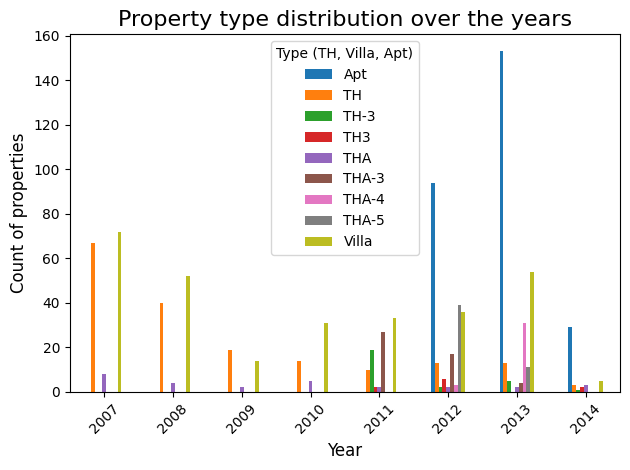

In [27]:
type_analysis = df_cleaned.groupby(['Year', 'Type (TH, Villa, Apt)']).size().unstack(fill_value=0)
type_analysis.plot(kind='bar')

plt.title('Property type distribution over the years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of properties', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

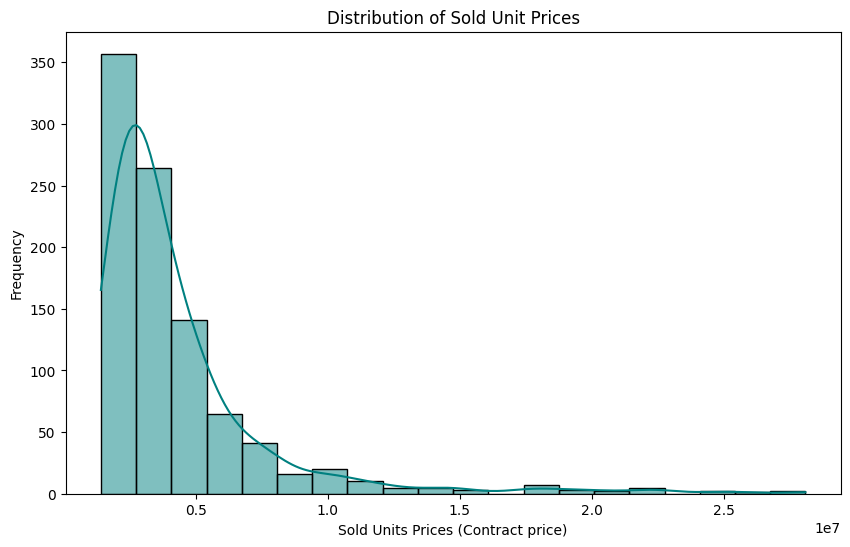

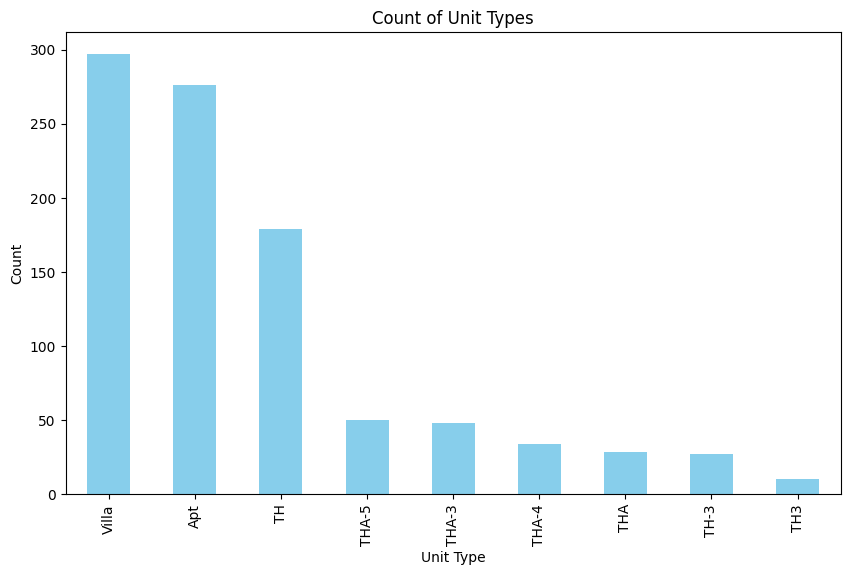

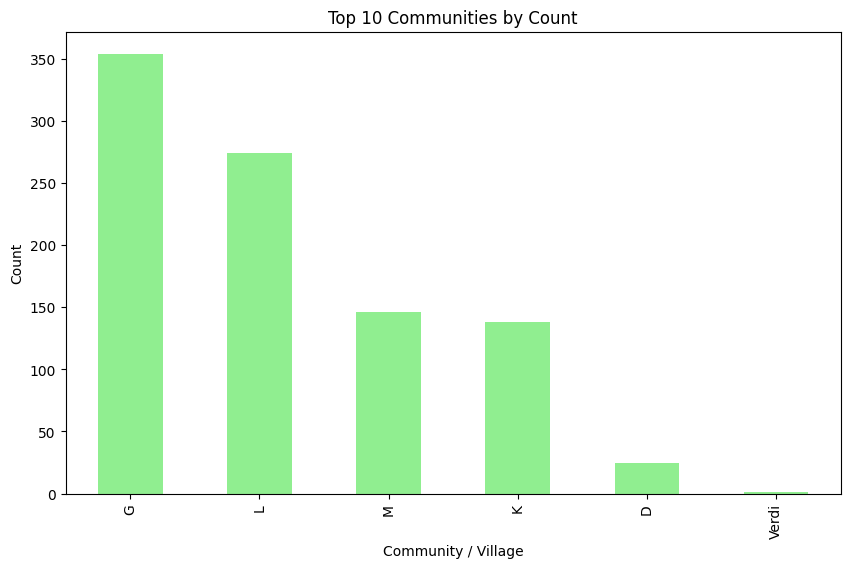

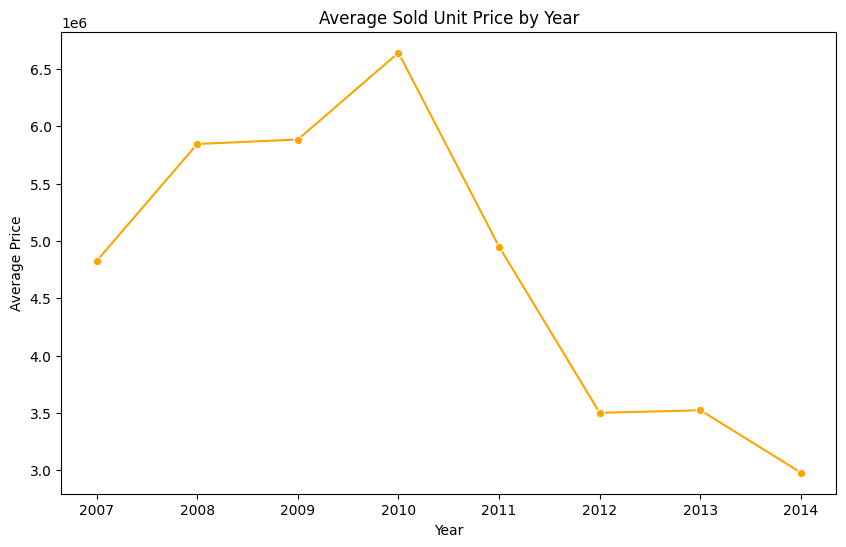

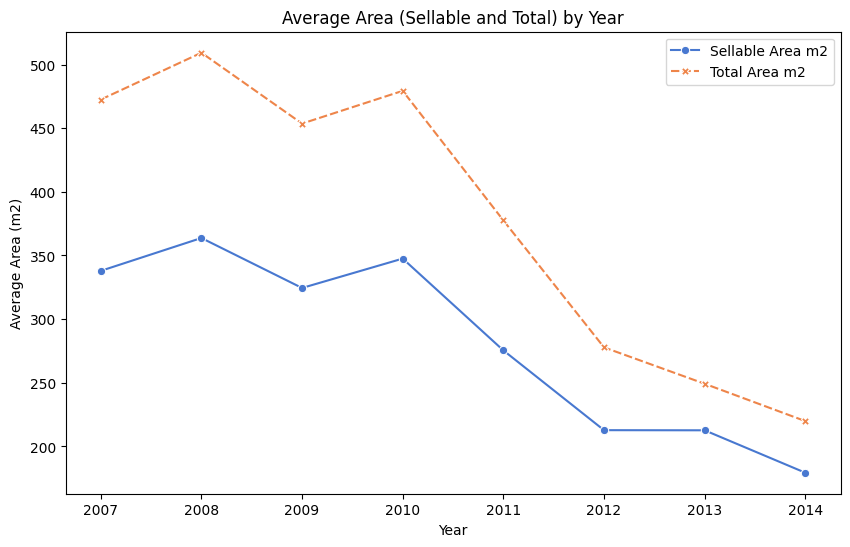

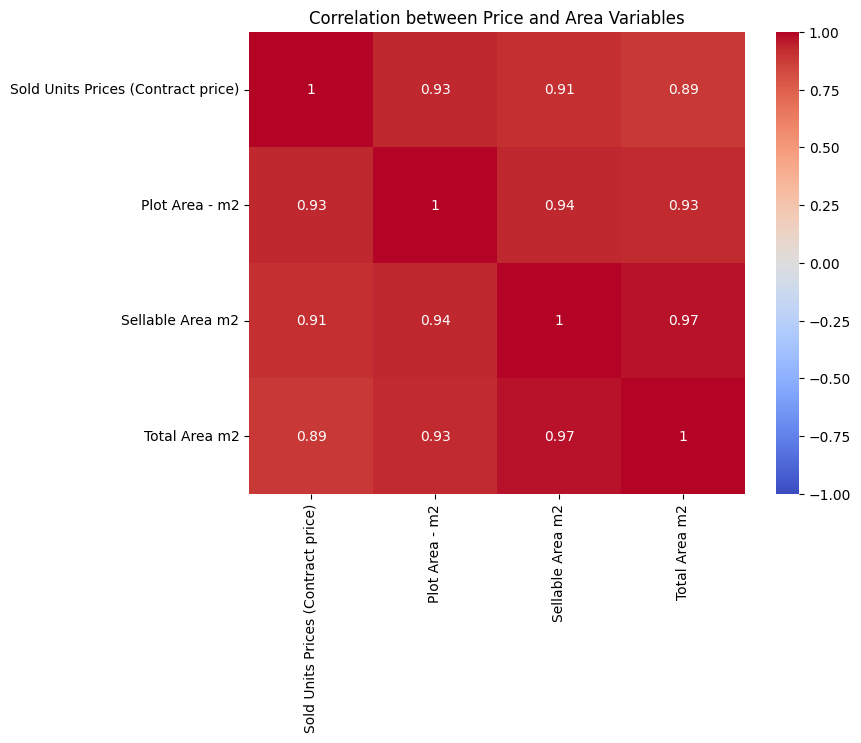

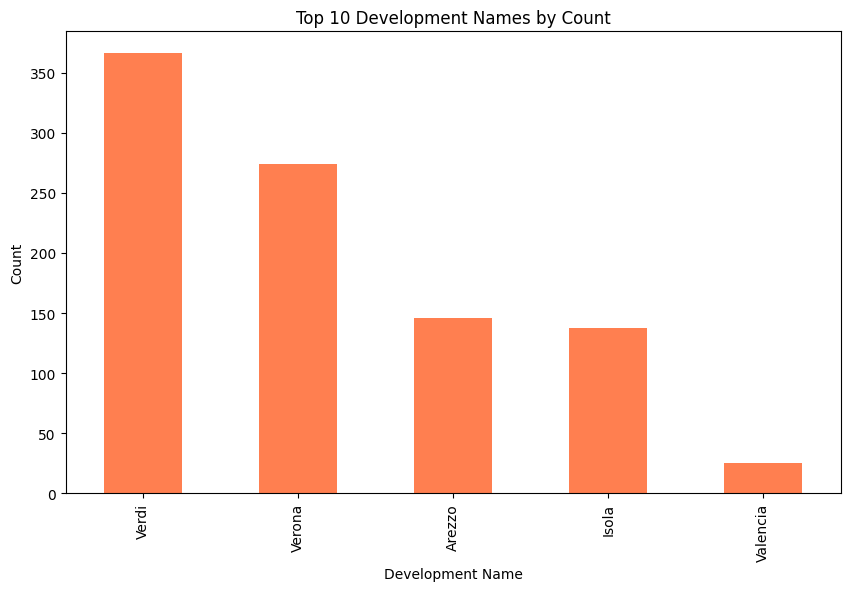

<Figure size 1000x600 with 0 Axes>

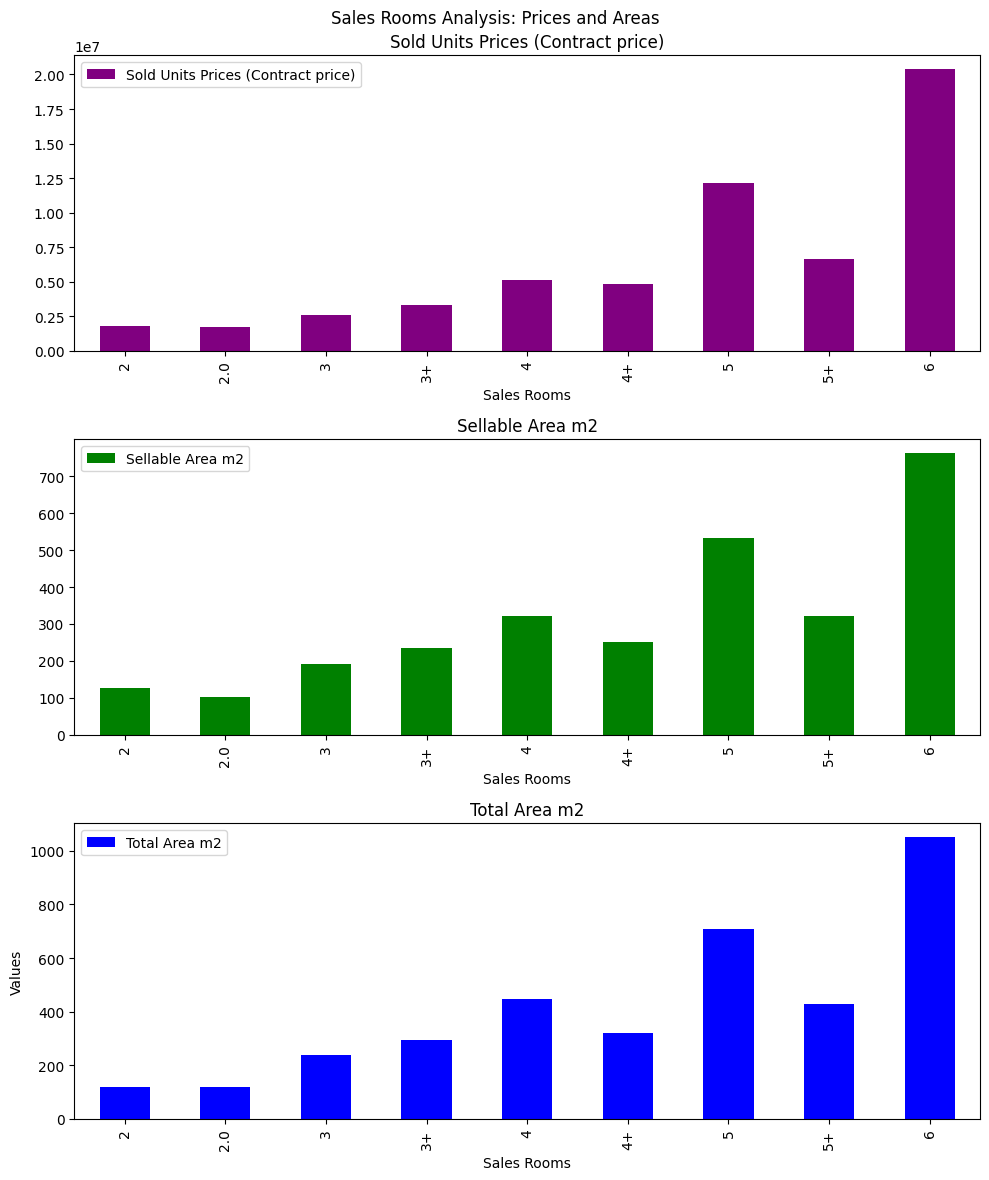

1. Basic descriptive statistics for numerical variables:
               No.  Plot Area - m2  Sellable Area m2  Terraces m2  \
count   949.000000      949.000000        949.000000   947.000000   
mean   1230.833509      436.000000        263.227608    67.872228   
std     598.486234      489.569815        127.578580    42.875225   
min       1.000000        0.000000        102.000000    12.000000   
25%     808.000000        0.000000        191.000000    40.000000   
50%    1406.000000      350.000000        236.000000    65.000000   
75%    1692.000000      598.000000        330.000000    91.000000   
max    1986.000000     3578.000000        807.000000   296.000000   

       Car Park - size(m2) for TH & villa / Garden for APT  Total Area m2  \
count                                         947.000000       949.000000   
mean                                           21.512144       347.396207   
std                                            23.760935       189.201188   
min          

In [28]:
# Set a professional color palette
sns.set_palette('Set2')

# Strip column names to remove unwanted spaces or tabs
df_cleaned.columns = df_cleaned.columns.str.strip()

# 1. Basic descriptive statistics for numerical variables
numeric_stats = df_cleaned.describe()

# 2. Analysis of categorical variables
categorical_analysis = {
    'Type': df_cleaned['Type (TH, Villa, Apt)'].value_counts(),
    'Model': df_cleaned['Model'].value_counts(),
    'Community': df_cleaned['Community / Village'].value_counts(),
    'City': df_cleaned['City'].value_counts(),
    'Year': df_cleaned['Year'].value_counts()
}

# 3. Average prices analysis by year
price_by_year = df_cleaned.groupby('Year')['Sold Units Prices (Contract price)'].agg(['mean', 'min', 'max', 'count'])

# 4. Area analysis
area_analysis = df_cleaned.groupby('Year')[['Sellable Area m2', 'Total Area m2']].mean()

# 5. Correlation between price and area
correlation = df_cleaned[['Sold Units Prices (Contract price)', 'Plot Area - m2', 'Sellable Area m2', 'Total Area m2']].corr()

# 6. Analysis of the most sold or repeated Development Names
development_analysis = df_cleaned['Development Name'].value_counts()

# 7. Sales Rooms Analysis related to prices and areas
sales_rooms_price_area = df_cleaned.groupby('Sales Rooms')[['Sold Units Prices (Contract price)', 'Sellable Area m2', 'Total Area m2']].mean()

# 8. KPI Analysis (separated)
kpi_analysis = {
    'Total Units Sold': df_cleaned.shape[0],
    'Average Sold Price': df_cleaned['Sold Units Prices (Contract price)'].mean(),
    'Max Sold Price': df_cleaned['Sold Units Prices (Contract price)'].max(),
    'Min Sold Price': df_cleaned['Sold Units Prices (Contract price)'].min(),
    'Average Plot Area': df_cleaned['Plot Area - m2'].mean(),
    'Average Sellable Area': df_cleaned['Sellable Area m2'].mean(),
    'Total Sales Value': df_cleaned['Sold Units Prices (Contract price)'].sum(),
}

# 1. Plotting the distribution of numerical variables
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Sold Units Prices (Contract price)'], bins=20, kde=True, color='teal')
plt.title('Distribution of Sold Unit Prices')
plt.xlabel('Sold Units Prices (Contract price)')
plt.ylabel('Frequency')
plt.show()

# 2. Bar plots for categorical variables
plt.figure(figsize=(10, 6))
df_cleaned['Type (TH, Villa, Apt)'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Count of Unit Types')
plt.xlabel('Unit Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
df_cleaned['Community / Village'].value_counts().nlargest(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Communities by Count')
plt.xlabel('Community / Village')
plt.ylabel('Count')
plt.show()

# 3. Average price analysis over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=price_by_year, x=price_by_year.index, y='mean', marker='o', color='orange')
plt.title('Average Sold Unit Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

# 4. Area analysis over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=area_analysis, markers=True, palette='muted')
plt.title('Average Area (Sellable and Total) by Year')
plt.xlabel('Year')
plt.ylabel('Average Area (m2)')
plt.show()

# 5. Correlation heatmap between price and areas
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Price and Area Variables')
plt.show()

# 6. Most sold Development Names (Top 10)
plt.figure(figsize=(10, 6))
development_analysis.nlargest(10).plot(kind='bar', color='coral')
plt.title('Top 10 Development Names by Count')
plt.xlabel('Development Name')
plt.ylabel('Count')
plt.show()

# 7. Sales Rooms Analysis with Prices and Areas
plt.figure(figsize=(10, 6))
sales_rooms_price_area.plot(kind='bar', subplots=True, layout=(3, 1), figsize=(10, 12), sharex=False, color=['purple', 'green', 'blue'])
plt.suptitle('Sales Rooms Analysis: Prices and Areas')
plt.xlabel('Sales Rooms')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

# Print the descriptive analysis and KPIs
print("1. Basic descriptive statistics for numerical variables:")
print(numeric_stats)
print("\n2. Categorical variable analysis:")
for key, value in categorical_analysis.items():
    print(f"\n{key}:")
    print(value)

print("\n3. Average price analysis by year:")
print(price_by_year)

print("\n4. Area analysis by year:")
print(area_analysis)

print("\n5. Correlation matrix:")
print(correlation)

print("\n6. Development Name analysis (Top 10 most sold or repeated):")
print(development_analysis.head(10))

print("\n7. Sales Rooms analysis with prices and areas:")
print(sales_rooms_price_area)

print("\n8. Key Performance Indicators (KPIs):")
for key, value in kpi_analysis.items():
    print(f"{key}: {value}")
